In [1]:
import wfdb
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import ast
import os

### Code for reading a single signal:

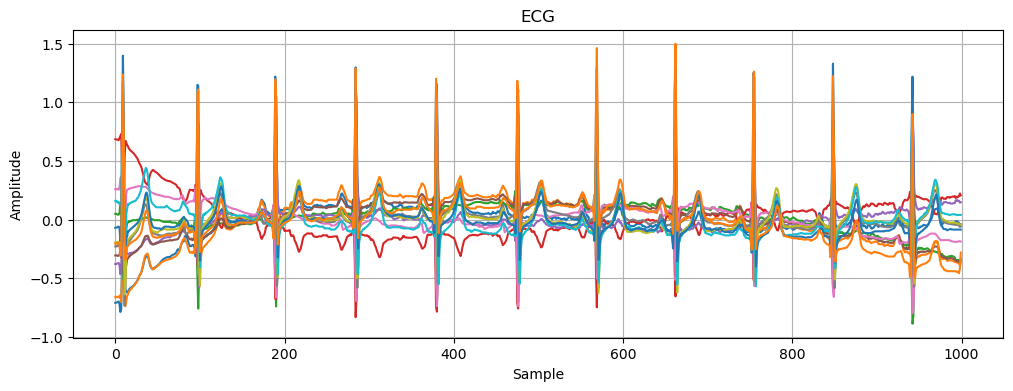

In [3]:
# Specify the path to your WFDB signal file (e.g., '01000_lr.dat')
signal_file = '01000_lr'

# Use wfdb.rdrecord() to read the signal file
record = wfdb.rdrecord(signal_file)

# Access the signal data and metadata
signal_data = record.p_signal  # NumPy array containing signal data
signal_metadata = record.__dict__  # Dictionary containing metadata

# You can access various metadata properties like sampling frequency, units, etc.
fs = record.fs  # Sampling frequency

# Visualize the signal
plt.figure(figsize=(12, 4))
plt.plot(signal_data)
plt.title('ECG')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [4]:
signal_data.shape # 12 different signals from each lead and each signal has 1000 samples. 

(1000, 12)

### Code for reading multiple signals:

In [5]:
def load_raw_data(df, sampling_rate, path):
    data = []
    
    warning_issued = False  # flag to track if a warning has been issued
    
    if sampling_rate == 100:
        filenames = df.filename_lr
    else:
        filenames = df.filename_hr
    
    for f in filenames:
        
        # Append file extensions for both .hea and .dat files
        file_path_dat = os.path.join(path, f + '.dat')
        file_path_hea = os.path.join(path, f + '.hea')
        
        # Check if both files exist
        if os.path.exists(file_path_dat) and os.path.exists(file_path_hea):
            signal, meta = wfdb.rdsamp(os.path.join(path, f))
            data.append(signal)
        else:
            if not warning_issued:
                print("Warning: One or more files do not exist. Further missing files will not be reported.")
                warning_issued = True
    
    if not data:
        print("No valid data found.")
        return None
    
    data = np.array(data)
    return data

sampling_rate=100

# load and convert annotation data
Y = pd.read_csv('ptbxl_database.csv', index_col='ecg_id')
Y.scp_codes = Y.scp_codes.apply(lambda x: ast.literal_eval(x))


### We need to create records100\00000\ folders in order to read multiple signals using Y 
#### - check filename_lr column of Y

In [6]:
# Y dataframe stores the address of each signal in the filename_lr column but we need to change the format of the address (for Windows)
Y['filename_lr'] = Y['filename_lr'].str.replace('/', '\\')

### X array stores the information from multiple signals and multiple leads

In [7]:
X = load_raw_data(Y, sampling_rate, os.getcwd())

In [8]:
X.shape # dimesions of X 

(16, 1000, 12)

In [10]:
X # for printing X

array([[[-1.190e-01, -5.500e-02,  6.400e-02, ..., -2.600e-02,
         -3.900e-02, -7.900e-02],
        [-1.160e-01, -5.100e-02,  6.500e-02, ..., -3.100e-02,
         -3.400e-02, -7.400e-02],
        [-1.200e-01, -4.400e-02,  7.600e-02, ..., -2.800e-02,
         -2.900e-02, -6.900e-02],
        ...,
        [ 6.900e-02,  0.000e+00, -6.900e-02, ...,  2.400e-02,
         -4.100e-02, -5.800e-02],
        [ 8.600e-02,  4.000e-03, -8.100e-02, ...,  2.420e-01,
         -4.600e-02, -9.800e-02],
        [ 2.200e-02, -3.100e-02, -5.400e-02, ...,  1.430e-01,
         -3.500e-02, -1.200e-01]],

       [[ 4.000e-03,  1.380e-01,  1.340e-01, ...,  1.920e-01,
          8.300e-02,  8.800e-02],
        [-2.000e-02,  1.160e-01,  1.360e-01, ...,  1.560e-01,
          5.700e-02,  6.300e-02],
        [-5.300e-02,  9.200e-02,  1.450e-01, ...,  1.070e-01,
          1.300e-02,  2.200e-02],
        ...,
        [ 1.210e-01,  3.980e-01,  2.770e-01, ..., -1.065e+00,
         -4.920e-01, -1.560e-01],
        [-3.

In [9]:
Y

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100\00000\00001_lr,records500/00000/00001_hr
2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100\00000\00002_lr,records500/00000/00002_hr
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100\00000\00003_lr,records500/00000/00003_hr
4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,True,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100\00000\00004_lr,records500/00000/00004_hr
5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,True,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100\00000\00005_lr,records500/00000/00005_hr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21833,17180.0,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-31 09:14:35,ventrikulÄre extrasystole(n) sinustachykardie ...,...,True,NaN,", alles,",NaN,NaN,1ES,NaN,7,records100\21000\21833_lr,records500/21000/21833_hr
21834,20703.0,300.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,sinusrhythmus lagetyp normal qrs(t) abnorm ...,...,True,NaN,NaN,NaN,NaN,NaN,NaN,4,records100\21000\21834_lr,records500/21000/21834_hr
21835,19311.0,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-08 10:30:27,sinusrhythmus lagetyp normal t abnorm in anter...,...,True,NaN,", I-AVR,",NaN,NaN,NaN,NaN,2,records100\21000\21835_lr,records500/21000/21835_hr


### The below cell will be tested later

In [ ]:
# Load raw signal data
X = load_raw_data(Y, sampling_rate, path) # currently you do not have all the signals, therefore it's not working

# Load scp_statements.csv for diagnostic aggregation
agg_df = pd.read_csv(path+'scp_statements.csv', index_col=0)
agg_df = agg_df[agg_df.diagnostic == 1]

def aggregate_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_class)
    return list(set(tmp))

# apply aggregate_diagnostic function to Y.scp_codes column
Y['diagnostic_superclass'] = Y.scp_codes.apply(aggregate_diagnostic)

# Split data into train and test
test_fold = 10
# Train
X_train = X[np.where(Y.strat_fold != test_fold)]
y_train = Y[(Y.strat_fold != test_fold)].diagnostic_superclass
# Test
X_test = X[np.where(Y.strat_fold == test_fold)]
y_test = Y[Y.strat_fold == test_fold].diagnostic_superclass